In [1]:
%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
import pandas as pd
import sympy as sp
import pymc
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy import stats
from scipy.special import beta
from scipy.misc import comb
from scipy.special import gamma


/Users/Jinkyoo/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# Simulate data
np.random.seed(123)

nobs = 100
theta = 0.3
Y = np.random.binomial(1, theta, nobs)

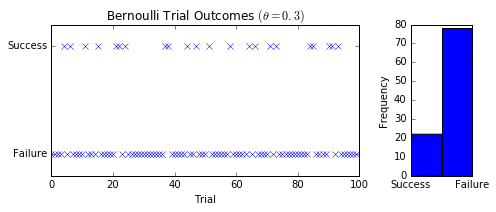

In [3]:
# Plot the data
fig = plt.figure(figsize=(7,3))
gs = gridspec.GridSpec(1, 2, width_ratios=[5, 1]) 
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])

ax1.plot(range(nobs), Y, 'x')
ax2.hist(-Y, bins=2)

ax1.yaxis.set(ticks=(0,1), ticklabels=('Failure', 'Success'))
ax2.xaxis.set(ticks=(-1,0), ticklabels=('Success', 'Failure'));

ax1.set(title=r'Bernoulli Trial Outcomes $(\theta=0.3)$', xlabel='Trial', ylim=(-0.2, 1.2))
ax2.set(ylabel='Frequency')

fig.tight_layout()

In [4]:
t, T, s = sp.symbols('theta, T, s')

# Create the function symbolically
likelihood = (t**s)*(1-t)**(T-s)

# Convert it to a Numpy-callable function
_likelihood = sp.lambdify((t,T,s), likelihood, modules='numpy')

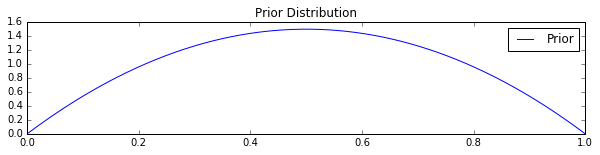

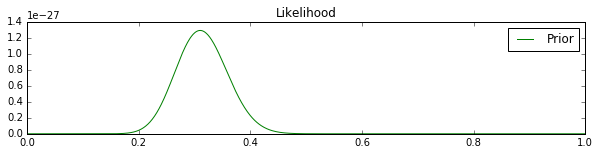

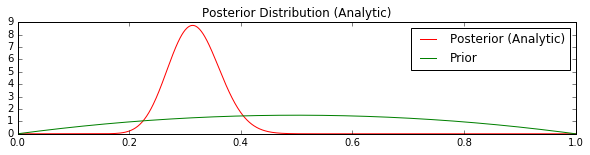

In [5]:
# Prior
a = 2
b = 2
Theta= np.linspace(0,1, 1000)


#Data generation
N=100
theta = 0.3
y = np.random.binomial(1, theta, N)



# Plot the prior
fig = plt.figure(figsize=(10,2))
ax = fig.add_subplot(111)
ax.plot(Theta, stats.beta(a, b).pdf(Theta), 'b');
ax.set(title='Prior Distribution')
ax.legend(['Prior']);



#Lilkelihood
likelihood = np.zeros(len(Theta))
for i, theta in enumerate(Theta):
    likelihood[i] = _likelihood(theta,N,y.sum())
    
# Plot the likelihood
fig = plt.figure(figsize=(10,2))
ax = fig.add_subplot(111)
ax.plot(Theta, likelihood, 'g');
ax.set(title='Likelihood')
ax.legend(['Prior']);    




# Posterior
a_hat = a + y.sum()
b_hat = b + N - y.sum()

# Plot the analytic posterior
fig = plt.figure(figsize=(10,2))
ax = fig.add_subplot(111)
X = np.linspace(0,1, 1000)
ax.plot(X, stats.beta(a_hat, b_hat).pdf(Theta), 'r');

# Plot the prior
ax.plot(X, stats.beta(a, b).pdf(X), 'g');

# Cleanup
ax.set(title='Posterior Distribution (Analytic)')
ax.legend(['Posterior (Analytic)', 'Prior']);




### Coin Tossing Example

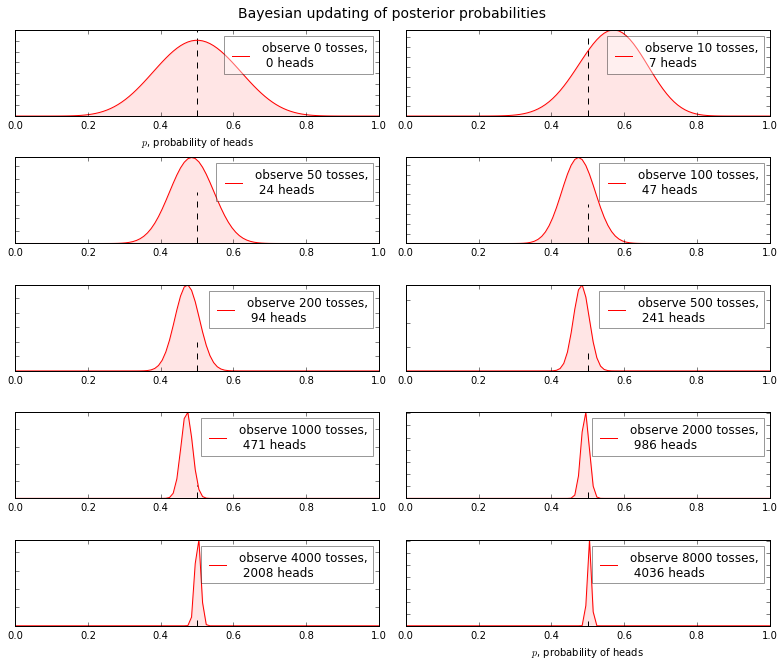

In [6]:
figsize(11, 9)
dist = stats.beta
alpha_0=10
beta_0=10
n_trials = [0, 10, 50, 100, 200, 500, 1000, 2000, 4000, 8000]
data = stats.bernoulli.rvs(0.5, size=n_trials[-1])
x = np.linspace(0, 1, 100)

for k, N in enumerate(n_trials):
    sx = plt.subplot(len(n_trials) / 2, 2, k + 1)
    plt.xlabel("$p$, probability of heads") \
        if k in [0, len(n_trials) - 1] else None
    plt.setp(sx.get_yticklabels(), visible=False)
    heads = data[:N].sum()
    y = dist.pdf(x, alpha_0 + heads, beta_0 + N - heads)
    plt.plot(x, y, color="r",label="observe %d tosses,\n %d heads" % (N, heads))
    plt.fill_between(x, 0, y, color="r", alpha=0.1)
    plt.vlines(0.5, 0, 4, color="k", linestyles="--", lw=1)
    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)
    plt.suptitle("Bayesian updating of posterior probabilities",
             y=1.02,
             fontsize=14)
    plt.tight_layout()

#### Prior 
#### Prior Predictive
#### Likelihood 
#### Posterior
#### Posterior Predictive 

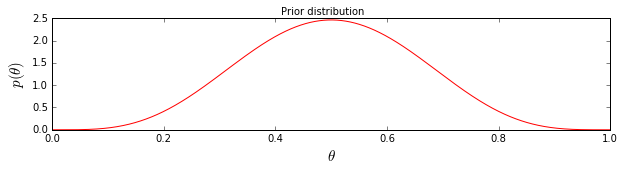

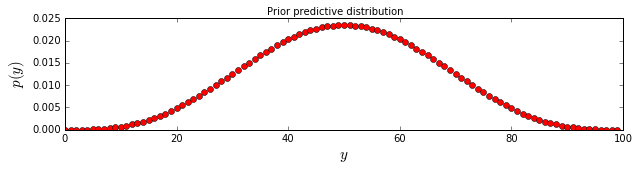

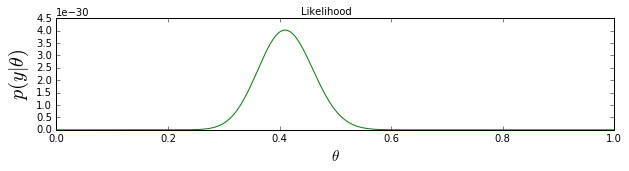

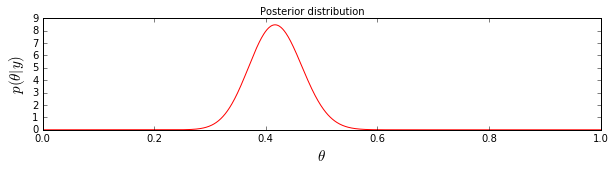

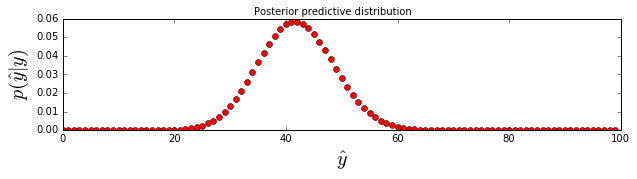

In [7]:
# Prior
a = 5
b = 5
Theta= np.linspace(0,1, 1000)


#Data generation
N=100
theta = 0.3
Y_hat=range(0,N)
y = np.random.binomial(1, theta, N)



#Prior
plt.figure(figsize=(10,2))
plt.plot(Theta, stats.beta(a, b).pdf(Theta), 'r');
plt.suptitle("Prior distribution")
plt.xlabel(r'$\theta$', fontsize=15)
plt.ylabel(r'$p(\theta)$', fontsize=15)



#Prior predictive distribution
y_prior_predictive = np.zeros(N)
for i, y_hat in enumerate(Y_hat):
    y_prior_predictive[i] = comb(N,y_hat)*beta(a+y_hat, b+N-y_hat)/beta(a,b)
 
plt.figure(figsize=(10,2))
plt.plot(Y_hat, y_prior_predictive, 'or');
plt.suptitle("Prior predictive distribution")
plt.xlabel(r'$y$', fontsize=15)
plt.ylabel(r'$p(y)$', fontsize=15)


#Lilkelihood
likelihood = np.zeros(len(Theta))
for i, theta in enumerate(Theta):
    likelihood[i] = _likelihood(theta,N,y.sum())
    
plt.figure(figsize=(10,2))
plt.plot(Theta, likelihood, 'g');
plt.suptitle("Likelihood")
plt.xlabel(r'$\theta$', fontsize=15)
plt.ylabel(r'$p(y|\theta)$', fontsize=20)



# Posterior distribution
a_hat = a + y.sum()
b_hat = b + N - y.sum()

# Plot the analytic posterior
plt.figure(figsize=(10,2))
plt.plot(Theta, stats.beta(a_hat, b_hat).pdf(Theta), 'r');
plt.suptitle("Posterior distribution")
plt.xlabel(r'$\theta$', fontsize=15)
plt.ylabel(r'$p(\theta|y)$', fontsize=15)





#Posterior predictive distribution
y_prior_predictive = np.zeros(N)
for i, y_hat in enumerate(Y_hat):
    y_prior_predictive[i] = comb(N,y_hat)*beta(a_hat+y_hat, b_hat+N-y_hat)/beta(a_hat,b_hat)
plt.figure(figsize=(10,2))
plt.plot(Y_hat, y_prior_predictive, 'or');
plt.suptitle("Posterior predictive distribution")
plt.xlabel("$\hat{y}$", fontsize=20)
plt.ylabel("$p(\hat{y}|y)$", fontsize=20)
